# 主成分分析論文読み

## タイトル

Jolliffe IT, Cadima J. 2016 *Principal component analysis: a review and recent developments.* Phil. Trans. R. Soc. A 374: 20150202.
<br/>
<br/>

## 1. Introduction

### PCA(Principal Component Analysis)

* 多次元データが持つ情報をで出来るだけ保存して低次元空間に情報を縮約するアルゴリズム
* 多次元データを2次元・3次元などに押し込めればデータを**可視化**することが出来る
* 事前の分布の仮定などはなくデータ依存, 説明的(descriptive)な方法
<br/>
<br/>

### 情報量と分散

* 射影したデータのばらつき（variability）が大きいほど元のデータの情報が保存されていると考えられる
<br/>
<br/>
<img src="../data/pca_figure1.jpeg" alt="PCA" width=500 />
<br/>
<br/>

### 目的
* 元のデータを射影したときに分散が最大となるような軸を探したい
<br/>
<br/>
<br/>

## 2. The basic method

### PCAのキソ
$\thinspace p \thinspace$個の$\thinspace n \thinspace$次元のベクトル $\boldsymbol{x}_1, ...,\boldsymbol{x}_p$ を並べたデータ行列 $\boldsymbol{X}$ を考え, $\boldsymbol{X}$ の各列の線形結合

<br/>

$$ \boldsymbol{X}\boldsymbol{a} = \sum^{p}_{j=1}a_{j}\boldsymbol{x}_j$$

<br/>

の中で最大の分散を与えるものを探す. 分散は以下の式で与えられる.

<br/>

$$var( \boldsymbol{X}\boldsymbol{a}) = \boldsymbol{a'Sa} = (\boldsymbol{a'X'Xa})$$

<br/>

知りたいのは軸の方向だけなので $||\boldsymbol{a}||^2 = 1$ の制約を課す. ラグランジュ関数

<br/>

$$L(\boldsymbol{a}, \lambda) = \boldsymbol{a'Sa} - \lambda(\boldsymbol{a'a}-1)$$

<br/>

を $\boldsymbol{a}$　に関して微分すると

<br/>

$$\boldsymbol{Sa} - \lambda\boldsymbol{a} = \boldsymbol{0} \Leftrightarrow \boldsymbol{Sa} = \lambda\boldsymbol{a}$$

<br/>

が得られる. すなわち $\boldsymbol{a}$ は $\boldsymbol{S}$ の固有ベクトルであり, 分散最大化問題が固有値問題に帰着された.

---
#### 復習：線形代数

任意の $p \times p$ 実対称行列（例えば上記の $\boldsymbol{S}$） は全部で $p$ 個の実数の固有値を持ち, これらのうち異なる固有値に属する固有ベクトルは互いに直交する. また, 実対称行列は適当な直交行列 $\boldsymbol{P}$ を用いて対角化することが出来る.

---
$\boldsymbol{S}$ の異なる固有値に属する固有ベクトルは互いに直交することと, ノルムの制約から, $\boldsymbol{a_{k}}, \boldsymbol{a_{k'}}$ をそれぞれ $\boldsymbol{S}$ の固有ベクトルとするとき, 

<br/>

$$\boldsymbol{a_{k}'a_{k'}} = \left\{
\begin{array}{ll}
1 & (k = k') \\
0 & (otherwise)
\end{array}
\right.$$

<br/>

である. これより, 各固有ベクトルによって得られる $\boldsymbol{X}$ の列ベクトルの線形結合　

<br/>

$$\boldsymbol{X}\boldsymbol{a}_k = \sum^{p}_{j=1}a_{jk}\boldsymbol{x}_j$$

<br/>

において, $k \neq k'$ のとき, これらの内積は

<br/>

$$\boldsymbol{a}_{k'}'\boldsymbol{X}' \boldsymbol{X}\boldsymbol{a}_k = \lambda_{k}\boldsymbol{a_{k}'a_{k'}} = 0$$

<br/>

より, 無相関になっていることが分かる.　下図がイメージ. 

<br/>
<br/>
<img src="../data/pca_2.png" alt="PCA_2" width=500 />
(https://statistics.co.jp/reference/software_R/statR_9_principal.pdf   より引用)
<br/>
<br/>

この時の各線形結合 $\boldsymbol{X}\boldsymbol{a}_k$ を**主成分**(Principal Component), 固有ベクトル $\boldsymbol{a}_k$ の各成分を**主成分負荷量**, $\boldsymbol{X}\boldsymbol{a}_k$ の各成分を**主成分得点**と呼ぶ.

<br/>

### 特異値分解（Singular Value Decomposition）

次元の削減を行う手法という意味では主成分分析と似たような手法. 

任意の ランクが $r$ である $n \times p$ 行列 $\boldsymbol{Y}$ は 

<br/>

$$\boldsymbol{Y} = \boldsymbol{ULA'}$$

<br/>

ここで, $\boldsymbol{U}$, $\boldsymbol{A}$ はそれぞれ $n \times r, p \times r$ 行列で各列は直交している. $\boldsymbol{L}$ は $r \times r$ の対称行列であり, その対角成分は $\boldsymbol{Y}$ の**特異値**と呼ばれる. $\boldsymbol{L} = diag(\sigma_1, ..., \sigma_r), \thinspace \sigma_1 \geq \sigma_2 \geq ... \geq \sigma_r \geq 0$ とするとこの分解は一意に定まる. 下図が分解のイメージ. (文字が違うので雰囲気だけ)

<br/>
<br/>
<img src="../data/svd.png" alt="svd" />
(https://qiita.com/kidaufo/items/0f3da4ca4e19dc0e987e   より引用)
<br/>
<br/>

### 特異値分解の性質

上の特異値分解の結果を使い, $q < r$ に対して $\boldsymbol{U}$ の列のうち左から $q$ 本を抜き出した行列を $\boldsymbol{U}_q$, $\boldsymbol{A}$ の列のうち左から $q$ 本を抜き出した行列を $\boldsymbol{A}_q$, $\sigma_1, ..., \sigma_q$ を対角成分に持つ行列を $\boldsymbol{L}_q$ として、

<br/>

$$\boldsymbol{Y}_q = \boldsymbol{U}_q\boldsymbol{L}_q\boldsymbol{A}_q'$$

<br/>

とすると, $\boldsymbol{Y}_q$ はランク $q$ の行列のうち, $\boldsymbol{Y} - \boldsymbol{Y}_q$ の各成分の2乗和を最小にする行列, すなわち成分の2乗誤差の意味で　$\boldsymbol{Y}$ を最もよく近似する行列になっている. 行列 $\boldsymbol{Y}$ を良く近似するより低いランクの行列を求めることは**低ランク近似**と呼ばれる.

<br/>

### 近似の評価

ランク $q$ の近似がどれだけ良いものかは以下の式で測ることが出来る

<br/>

$$\pi = \frac{\sum_{i=1}^{q}\lambda_i}{\sum_{j=1}^{p}\lambda_j}$$

<br/>

この値が70％を超えるような $q$ を選ぶのがcommon practiceであると論文中では述べられている.

<br/>

### 実践：特異値分解

行列の低ランク近似を実際にやってみる. 近似の様子がわかりやすいように,  <a href="http://cbcl.mit.edu/software-datasets/heisele/facerecognition-database.html">The MIT-CBCL face recognition database</a> からダウンロードしてきた顔画像を用いる.

<br/>
<br/>
<div align="center">
    <img src="../data/face.png" alt="svd" width=350/>
    <div>(使用する顔画像)</div>
</div>
<br/>
<br/>


In [1]:
import imageio
import numpy as np 
import matplotlib.pyplot as plt 

(1024, 1024)


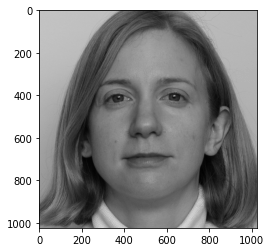

In [2]:
img = imageio.imread("../data/face.png")
print(img.shape)
plt.imshow(img, cmap="gray")

#pcs: 1, proportion: 0.32296493521119146
#pcs: 5, proportion: 0.49156763520199526
#pcs: 10, proportion: 0.5640285435895953
#pcs: 20, proportion: 0.6309775814104586
#pcs: 30, proportion: 0.6677457322401906
#pcs: 50, proportion: 0.7157565515718992
#pcs: 75, proportion: 0.7560323723592044
#pcs: 100, proportion: 0.7868570657373309
#pcs: 200, proportion: 0.8683412319541218
#pcs: 500, proportion: 0.9714661886354935


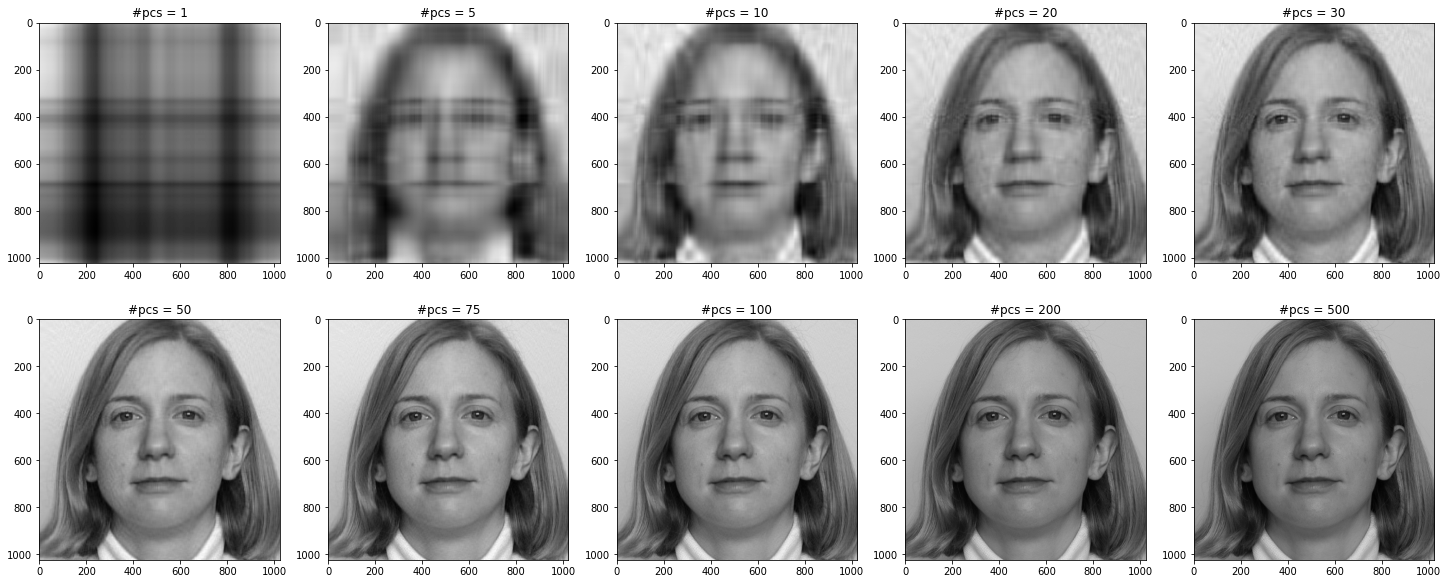

In [3]:
# 特異値分解
U, D, V = np.linalg.svd(img)

fig = plt.figure(figsize=(25, 10))

num_pcs = [1, 5, 10, 20, 30, 50, 75, 100, 200, 500]

for i in np.arange(10):
    ax = fig.add_subplot(2, 5, i+1)
    print(f"#pcs: {num_pcs[i]}, proportion: {np.sum(D[:num_pcs[i]]) / np.sum(D)}")
    U_q = U[:, :num_pcs[i]]
    V_q = np.dot(np.diag(D), V)[:num_pcs[i], :]
    X_q = np.dot(U_q, V_q)

    plt.imshow(X_q, cmap="gray")
    ax.set_title(f"#pcs = {num_pcs[i]}")
    

In [4]:
# Biplotsみたいに可視化してみる


### 可視化の手法：Biplots

中心化されたデータ行列 $\boldsymbol{X}^{*}$ の特異値分解を $\boldsymbol{ULA'}$ とし,  $\boldsymbol{X}^{*}$ を以下のように分解する

<br/>

$$\boldsymbol{X}^{*} = \boldsymbol{GH'}$$

<br/>

ただし, $\boldsymbol{G} = \boldsymbol{U}$,  $\boldsymbol{H} = \boldsymbol{AL}$ である. この時,  $\boldsymbol{G}$, $\boldsymbol{H}$の列を左から  $q$ 列（通常は $q = 2$）取り出してプロットしたものが以下 (本文では7変数の化石の歯のデータ95件を使用)

<br/>
<br/>
<img src="../data/biplot.png" alt="svd" />
(本文より引用)
<br/>
<br/>

ただし,  $\boldsymbol{G}$ から取り出したものは点で,  $\boldsymbol{H}$　から取り出したものは赤字のベクトルで表記されている. このようなプロットをするのは上のような分解が $\boldsymbol{X}^{*}$ のベクトル $\boldsymbol{x}_i$ を $\boldsymbol{H}$ の各行 $\boldsymbol{h}_j$ を基底ベクトル, $\boldsymbol{G}$ の各行の値 $g_{ij}$ を係数として

<br/>

$$\boldsymbol{x}_i = \sum_{j}g_{ij}\boldsymbol{h}_j$$

<br/>

と分解することと同じなことに対応していると考えられる.
<br/>
<br/>
<br/>

---
#### 番外編：白色化

論文中では主成分分析を行う前の処理として中心化や標準化が紹介されているが, それらより少し高度な手法として**白色化**という処理があるので紹介したい. 発想としては, 「訓練データの成分間の相関をなくす」というものである.

$p$  次元のデータ $\boldsymbol{x} = (x_1, ..., x_p)$ を考える. $n$ 個のサンプル $\boldsymbol{x}_1, ..., \boldsymbol{x}_n$ からあらかじめその平均を引いたものを並べたデータ行列 $\boldsymbol{X}$ を作ると, その共分散行列は

<br/>

$$\Phi_X = \frac{1}{n}\boldsymbol{X}\boldsymbol{X}'$$

<br/>

で与えられる. ここで, 各サンプルに $p \times p$ 行列 $G$ による線形変換

<br/>

$$\boldsymbol{h}_n = \boldsymbol{G}\boldsymbol{x}_n$$

<br/>

を施したときの $\boldsymbol{h}_1, ..., \boldsymbol{h}_n$ の共分散行列

<br/>

$$\Phi_H = \frac{1}{n}\boldsymbol{H}\boldsymbol{H}'$$

<br/>

が**対角行列**になるように $\boldsymbol{G}$ を定める. 共分散行列の $(i, j)$ 成分はサンプルの $i$ 成分と $j$ 成分の相関を表しているから, それが対角行列である時 $(i, j)$ 成分 $(i\neq j)$ の相関が無くなっていると言える. 対角行列といっても色々と考えられるので例えば $\Phi_H = \boldsymbol{I}$ (単位行列) とすると,  $\boldsymbol{H} = \boldsymbol{GX}$ より 

<br/>

$$\boldsymbol{G}'\boldsymbol{G} = \boldsymbol{\Phi}_X^{-1}$$

<br/>

が得られる. ここで, $\boldsymbol{\Phi}_X$ の固有値分解を $\boldsymbol{ULU}'$ とおくと, $\boldsymbol{\Phi}_X^{-1} = \boldsymbol{U} \boldsymbol{L}^{-1}\boldsymbol{U'}$ だから, 

<br/>

$$\boldsymbol{G} = \boldsymbol{Q}\boldsymbol{L}^{-1/2}\boldsymbol{U}'$$

<br/>

となる. ここで, $\boldsymbol{Q}$ は任意の $p \times p$ の直交行列である. 例えば $\boldsymbol{Q} = \boldsymbol{I}$ としたとき求められる $\boldsymbol{G}$ は解の一つであり, このように $\boldsymbol{G}$ を求めて元のデータを変換することを白色化と呼ぶ. 他にも $\boldsymbol{Q} = \boldsymbol{E}$ とするような方法も考えられる. 

<br/>

#### 実践：白色化


---

自然画像のデータセット <a href="https://www.cs.toronto.edu/~kriz/cifar.html">CIFAR10</a> を用いて白色化を行ってみる. 訓練データ50000件（$32 \times 32$ のRGB画像）を使用することにする.


In [5]:
from keras.datasets import cifar10
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
X_train.shape

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


(50000, 32, 32, 3)

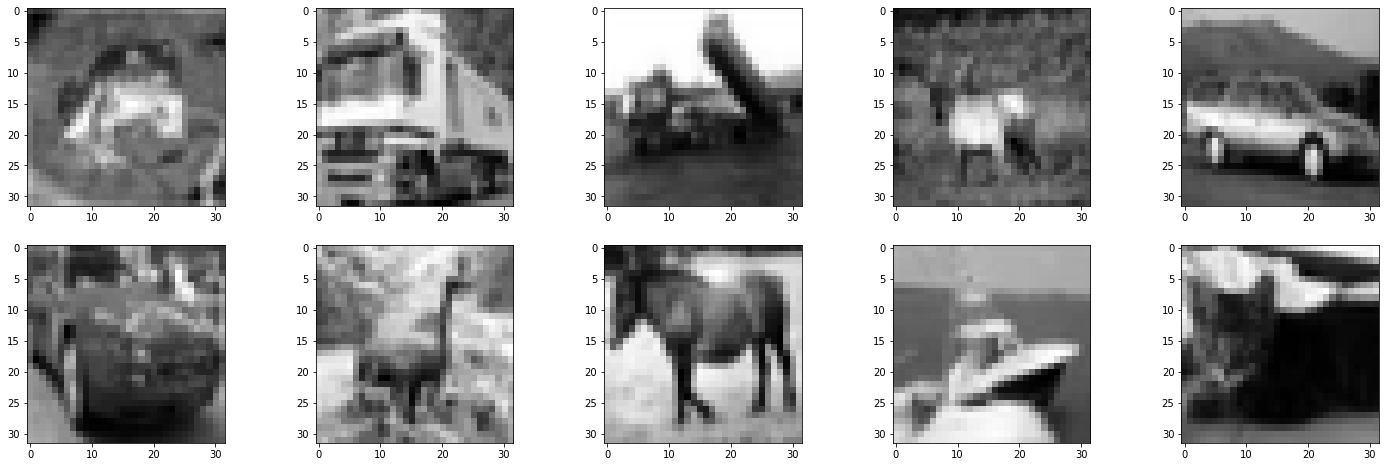

In [6]:
import cv2

N, H, W, _ = X_train.shape
X = np.empty((N, H, W))
for i in range(N):
    X[i] = cv2.cvtColor(X_train[i], cv2.COLOR_RGB2GRAY)

fig = plt.figure(figsize=(25, 8))

for i in np.arange(10):
    ax = fig.add_subplot(2, 5, i+1)
    plt.imshow(X[i], cmap="gray")

In [7]:
X = X.reshape(X.shape[0], -1)
X = X - np.mean(X, axis=0)
X.shape

(50000, 1024)

In [8]:
Phi_X = np.dot(X.T, X) / X.shape[0]
U, L, _ =  np.linalg.svd(Phi_X)
G = np.dot(np.diag(1. / (np.sqrt(D)+1E-6)), U.T)

求めた $\boldsymbol{G}$ を使って元の画像データを変換してみる

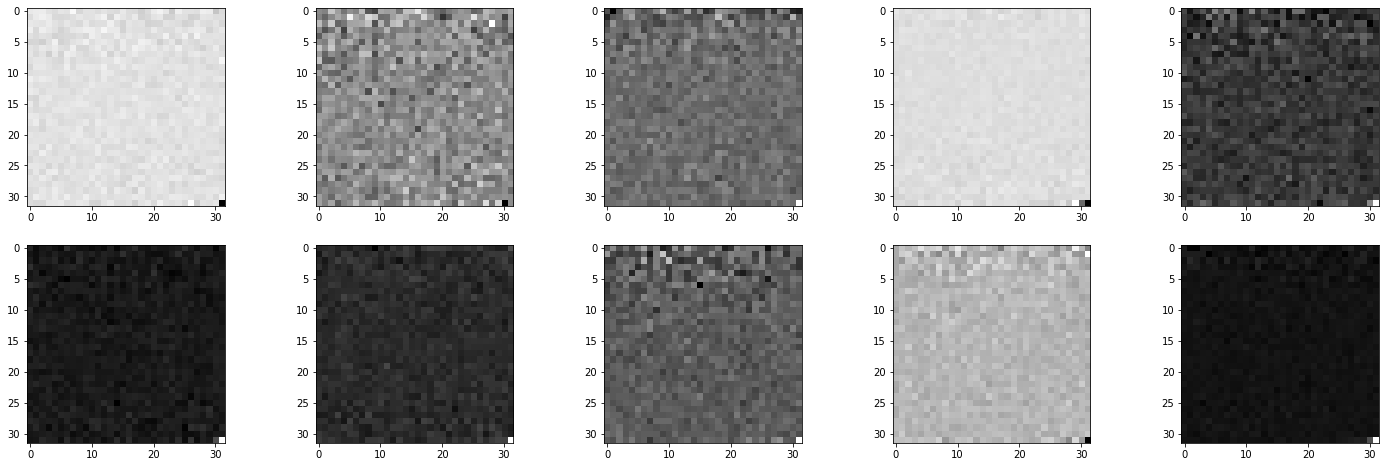

In [9]:
def normalize_image(x, epsilon=1E-6):
  vmin = np.min(x)
  vmax = np.max(x)
  return (x - vmin) / (vmax - vmin + epsilon)

H_mat = np.dot(G, X.T).T

fig = plt.figure(figsize=(25, 8))

for i in np.arange(10):
    ax = fig.add_subplot(2, 5, i+1)
    plt.imshow(H_mat[i].reshape(32, 32), cmap="gray")

元の画像の構造はほとんど保存されていないように見える.

$\boldsymbol{G}$ の行ベクトルを画像フォーマットに直してみる.

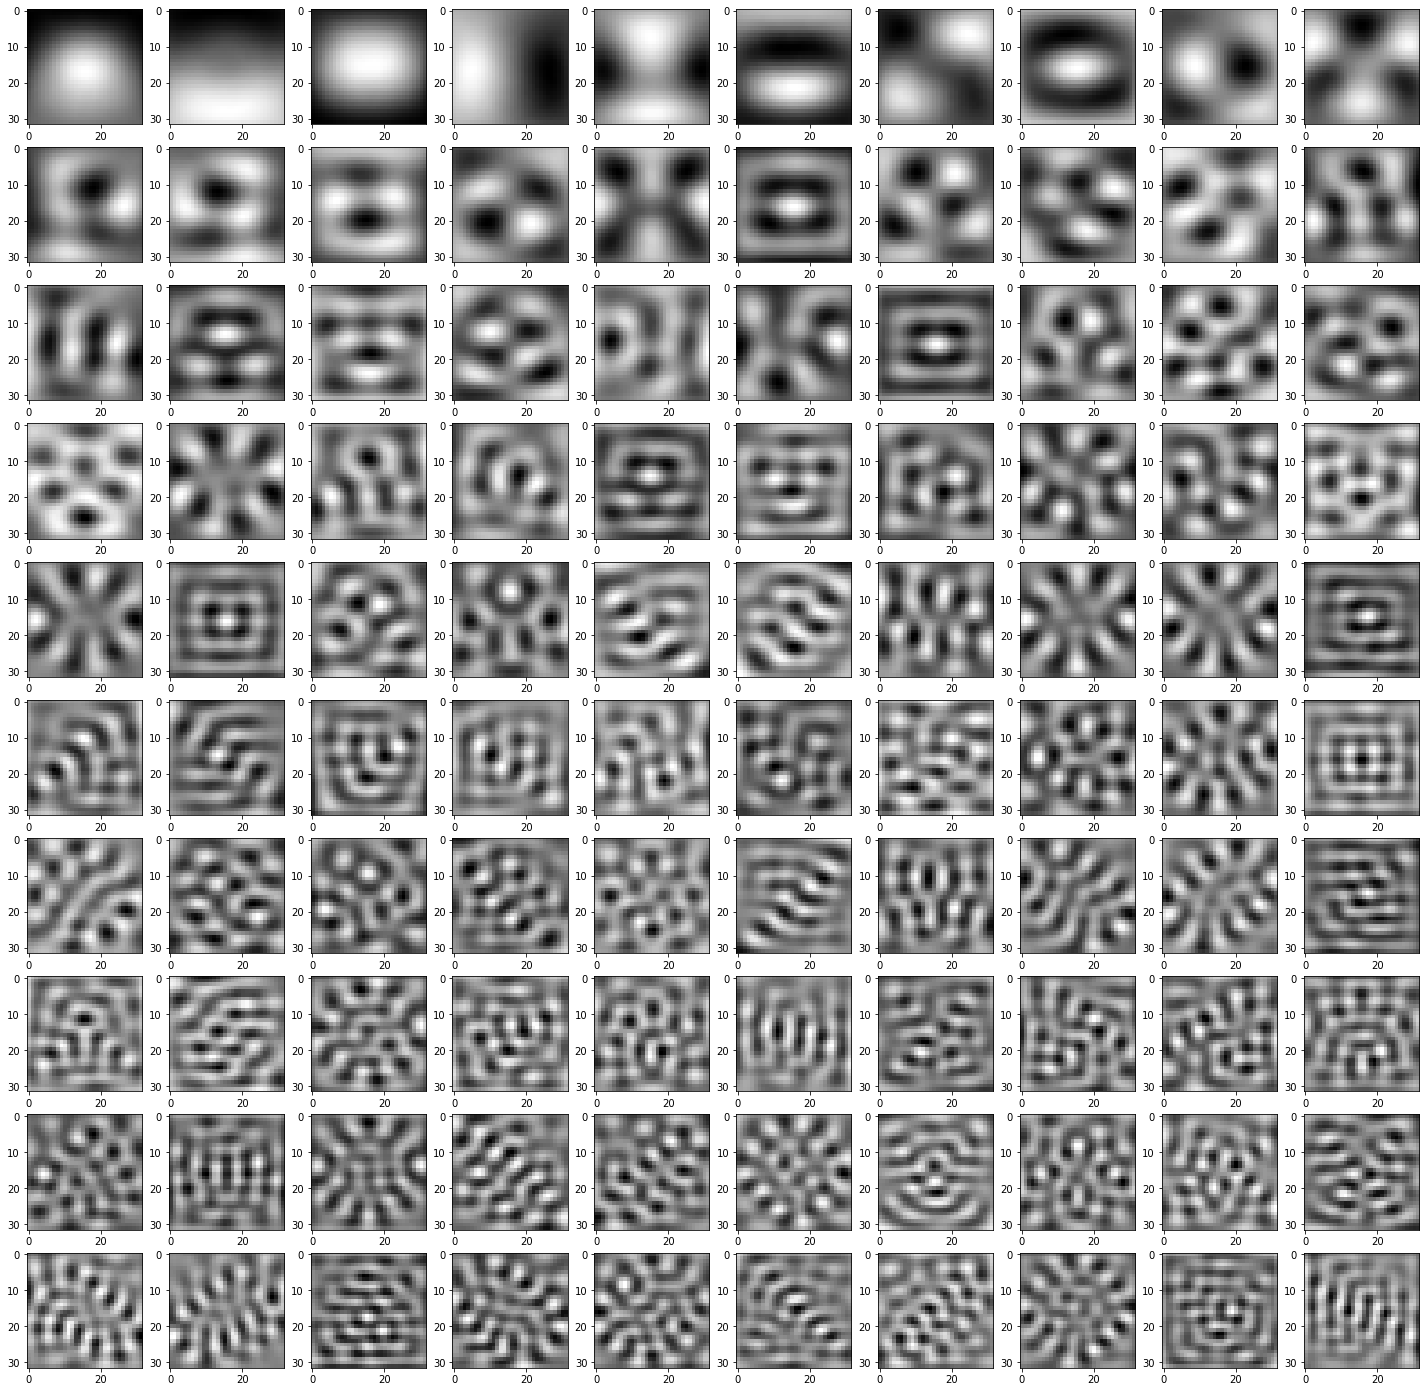

In [10]:
# Gの行ベクトルを画像に戻してみる
fig = plt.figure(figsize=(25, 25))

for i in np.arange(100):
    ax = fig.add_subplot(10, 10, i+1)
    plt.imshow(normalize_image(G[i, :]).reshape(H, W), cmap="gray")

これらは離散コサイン基底に似ている（左上から右下にかけて周波数の低いものから高いものが並んでいる）ように見える. 実際に調べてみると, 白色化の元となるアイデアは以下の論文

<br/>

Bell J., Sejnowski JT., (1996) The "Independent Components" of Natural Scenes are Edge Filters, *Vision Research*, 37, 3327-3338.

<br/>

で提案されたものであり, その中で

<br/>

$\boldsymbol{G}$ の行ベクトルは振幅スペクトル順に並べられたglobal Fourier filtersである

<br/>

と述べられているが詳細は不明.

## 3. Adaptations of principal component analysis

### Robust PCA